# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [20]:
from  random import random
import math

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [10]:
a = [[1,2],[3,4]]
a = np.array(a)
print(a[1,:])

[3 4]


In [2]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
  Centroids = np.array(Cluster_Centroids)
  Cluster_Distance = []
  for i in range (len(Data_points)):
    distances = []
    for j in range(len(Centroids)):
      if(Centroids.ndim==2):
        c = Centroids[j,:]
        if(c.size!=0 and Data_points[i].size!=0):
          if(Distance_Type==0):
            distance = np.linalg.norm(Data_points[i] - c)
          else:
            point = np.array(Data_points[i])
            c = np.array(c)
            point_mean = np.mean(point)
            c_mean = np.mean(c)
            nominator = np.dot((c-c_mean),(point-point_mean))
            denominator = np.sqrt(np.sum((np.square(point-point_mean)))*np.sum((np.square(c-c_mean))))
            distance = 1-(nominator/denominator)
          distances.append(distance)
        Cluster_Distance.append(distances)

  Cluster_Distance = np.array(Cluster_Distance)
    


## write code here for the Distance function here # 
  return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [6]:
def Distortion(Data_points,Centroids,Number_of_Clusters,shortest):
    distortion=[]
    for k in range((Number_of_Clusters)):
        squared = []
        for i in range(len(Data_points)):
            if (shortest[i] == k):
                c = Centroids[shortest[i]]
                if (c.size != 0):
                    squared_distance = np.linalg.norm(Data_points[i] - c)
                    squared.append(squared_distance)
            
        squared = np.array(squared)
        
        squared_sum =np.sum(squared)
        squared_mean = np.mean(squared_sum)
        distortion.append(squared_mean)
     
    return np.array(distortion)

In [21]:
def Initial_Cetnroids(Data_points,Number_of_Clusters,distance_type):
    min_p = np.amin(Data_points, axis=0)
    max_p = np.amax(Data_points, axis=0)

    centroids_minDistortion = []
    for i in range(10):
        centroids = []
        for k in range(Number_of_Clusters): 
            c = min_p + (random() * (max_p - min_p))
            centroids.append(c)
        distances = GUC_Distance(centroids, Data_points, distance_type)
        shortest = np.argmin(distances, axis=1)
        distortion = Distortion(Data_points,centroids,Number_of_Clusters,shortest)
        distortion_sum = np.sum(distortion)

        if(np.isnan(distortion_sum)):
            distortion = np.nan_to_num(distortion)

        distortion_sum = np.sum(distortion)
        if(i==0):
            distortion_0 = np.sum(distortion)
            centroids_minDistortion = centroids
        #compare with the last distortion sum
        if(np.sum(distortion) <= distortion_0):
            centroids_minDistortion = centroids

        #update this sum to be the last distortion sum
        distortion_0 = np.sum(distortion)
    
    
    return centroids_minDistortion



In [22]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
  # write code for intial cluster heads here 
  centroids = Initial_Cetnroids(Data_points,Number_of_Clusters,Distance_Type)
  # write your your loop 

  Final_Cluster_Distance = []
  distortion_0 = np.array([])
  while (True):
    distances = GUC_Distance(centroids, Data_points, Distance_Type)
    shortest = np.argmin(distances, axis=1)
    distortions = np.array(Distortion(Data_points,centroids,Number_of_Clusters,shortest))

    if(np.isnan(np.sum(distortions))):
      distortions = np.nan_to_num(distortions)
    
    centroids=[]
    for k in range((Number_of_Clusters)):
      clusters = []
      for i in range(len(Data_points)):
        if (shortest[i] == k):
          clusters.append(Data_points[i])   
        
      clusters=np.array(clusters)
      clusters_mean = np.mean(clusters, axis=0)
      if(np.isnan(np.sum(clusters_mean))):
        min_p = np.amin(Data_points, axis=0)
        max_p = np.amax(Data_points, axis=0)
        clusters_mean = min_p + (random() * (max_p - min_p))
      centroids.append(clusters_mean)
        
        
        
      distortion_sum = np.sum(distortions)
      distortion_0_sum=np.sum(distortion_0)

      if(math.isclose(distortion_sum,distortion_0_sum,rel_tol=0.1)):
          break;
    
      #update this sum to be the last distortion sum
      #reset current distorions
      distortion_0 = distortions
      distortions = np.array([])

  Cluster_Metric = np.sum(distortions)
  shortest = np.array([shortest])
  Final_Cluster_Distance = np.concatenate((shortest.T,Data_points), axis=1)  

    
  return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [10]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [11]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

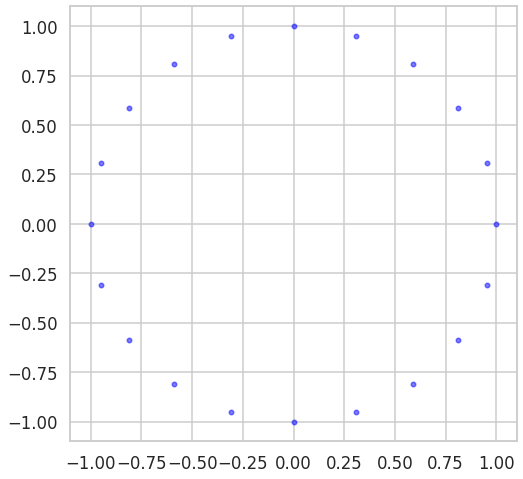

In [16]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

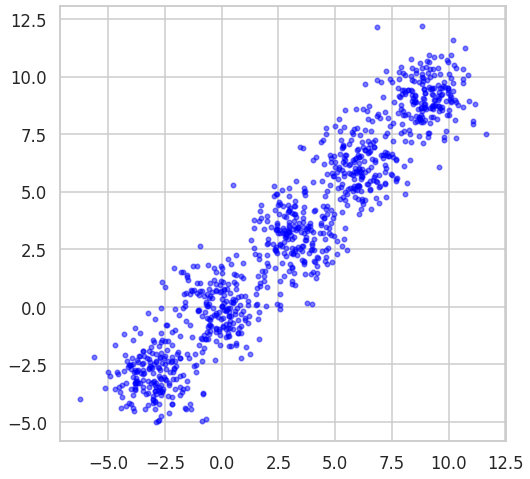

In [17]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

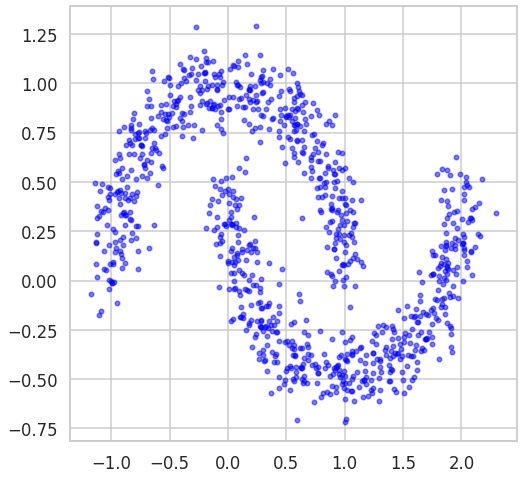

In [18]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X1,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)
 



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X2,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)
 



In [ ]:
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X3,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)
 



In [ ]:
###pearson
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X1,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)
 

In [ ]:
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X2,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)
 

In [ ]:
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(X3,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)
 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

In [ ]:
##prepare data
customer_data = pd.read_csv('Customer data.csv')
customer_data.drop('ID',inplace=True,axis=1)
clusters=[2,3,4,5,6,7,8,9,10]
scaler = MinMaxScaler()
scaler.fit(customer_data)
scaled = scaler.transform(customer_data)
scaled = pd.DataFrame(scaled)
np.round(scaled,2)
data=scaled.to_numpy()



In [ ]:
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(data,i,0)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)

In [ ]:
#####pearson
metric = []
clusters = [2,3,4,5,6,7,8,9,10]
cluster_0 = 0
best_k = 0
for i in clusters:
    [X,cluster_metric,centroids]=GUC_Kmean(data,i,1)
    display_cluster(X,centroids,i)
    plt.figure()
    metric.append(cluster_metric)
    if(math.isclose(cluster_metric,cluster_0,rel_tol=0.1)):
        if(cluster_metric > cluster_0):
            best_k=i-1
        else:
            best_k=i
    cluster_0=cluster_metric
plt.plot(clusters,metric)
plt.show
print("best_k ",best_k)